In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import gc, os, sys, itertools

In [3]:
weather_df = pd.read_csv('datasets/weather.csv');
cabrides_df = pd.read_csv('datasets/cab_rides.csv');

In [4]:
cabrides_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [5]:
cabrides_df['time_stamp'] = pd.to_datetime(cabrides_df['time_stamp'])
weather_df['time_stamp'] = pd.to_datetime(weather_df['time_stamp'])

In [6]:
a = pd.concat([cabrides_df, weather_df])
a.shape

(699347, 17)

In [7]:
a['day'] = a.time_stamp.dt.day
a['hour'] = a.time_stamp.dt.hour

In [8]:
a.fillna(0, inplace=True)

In [9]:
a.isna().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
temp                0
location            0
clouds              0
pressure            0
rain                0
humidity            0
wind                0
day                 0
hour                0
dtype: int64

In [10]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'temp', 'location',
       'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day', 'hour'],
      dtype='object')

In [11]:
a.groupby('cab_type').count()


,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,temp,location,clouds,pressure,rain,humidity,wind,day,hour
cab_type,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


<AxesSubplot:xlabel='cab_type'>

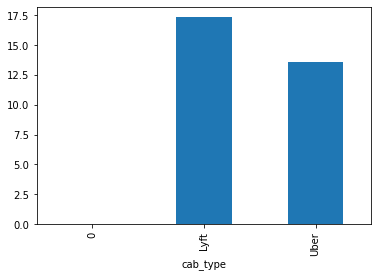

In [12]:
a.groupby('cab_type')['price'].mean().plot.bar()

In [13]:
x = a[['distance', 'temp', 'pressure', 'humidity', 'wind', 'rain', 'clouds', 'day', 'hour', 'surge_multiplier']]
y = a['price']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [15]:
linear = LinearRegression()
linear

LinearRegression()

In [16]:
linear.fit(x_train, y_train)

LinearRegression()

In [17]:
preds = linear.predict(x_test)

In [18]:
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': preds
})
result

,Actual,Predicted
159342,19.5,17.029589
460809,32.5,17.564508
226256,5.0,12.444566
422581,13.5,14.762550
663528,10.5,15.959750
...,...,...
512105,38.5,17.513564
65067,32.5,21.054220
137247,7.0,15.221052
25331,7.0,17.004117
